## Problem Statemant 

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

*Business Goal* :  
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

For analysis of this case study we follow following steps :
- Data Understanding / Cleaning
- Data Visualization
- Data Preparation
- Data Modelling and Evaluation

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

## Data Understanding/Cleaning

In [2]:
# Importing data
df=pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Checking shape of data
df.shape

(730, 16)

In [4]:
# Checking data types of different columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# Checking missing values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
# Dropping unnecessary columns
df.drop(columns=['instant','dteday','casual','registered'],inplace=True)

In [7]:
# Mapping values of different seasons and converting into required data type
df['season']=df['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'}).astype('category')

# Mapping values of different months and converting into required data type
df.mnth=df['mnth'].map({1:'Jan',2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'july',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}).astype('category')

# Mapping values of different weekdays and converting into required data type
df.weekday=df['weekday'].map({1:'Tue',2:'Wed',3:'Thur',4:'Fri',5:'Sat',6:'Sun',0:'Mon'}).astype('category')

# Mapping values of different weathersit and converting into required data type
df.weathersit=df['weathersit'].map({1:'clear',2:'misty_cloudy',3:'light_snow',4:'heavy_rain'}).astype('category')

In [8]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sun,0,misty_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Mon,0,misty_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Tue,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Wed,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Thur,1,clear,9.305237,11.46350,43.6957,12.522300,1600


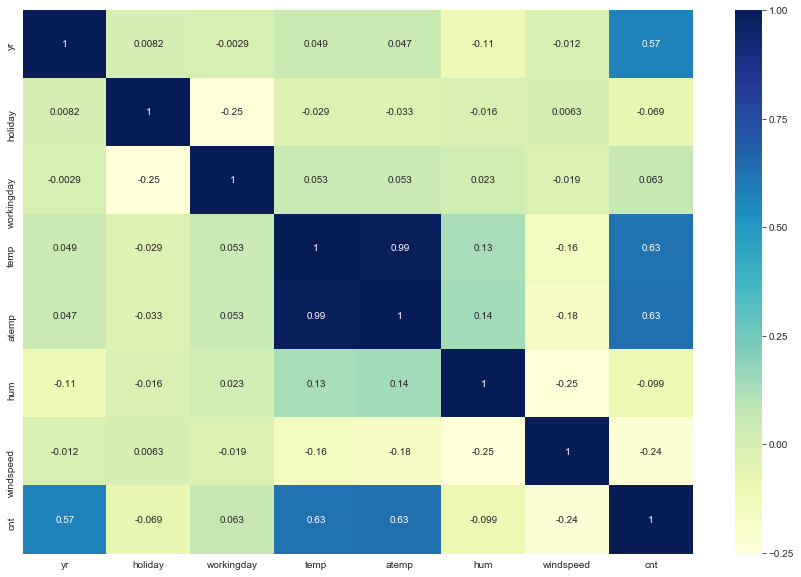

In [9]:
# Checking correlation amoung different variables and removing those which has very high correlation

sns.set_style('whitegrid')
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')
a,b=plt.ylim()
plt.ylim(a+0.5,b-0.5)
plt.show()

In [10]:
# Temp and atemp has very high correlation therefore we will remove one 
df.drop(columns='atemp',inplace=True)

## EDA

### Univariate Analysis

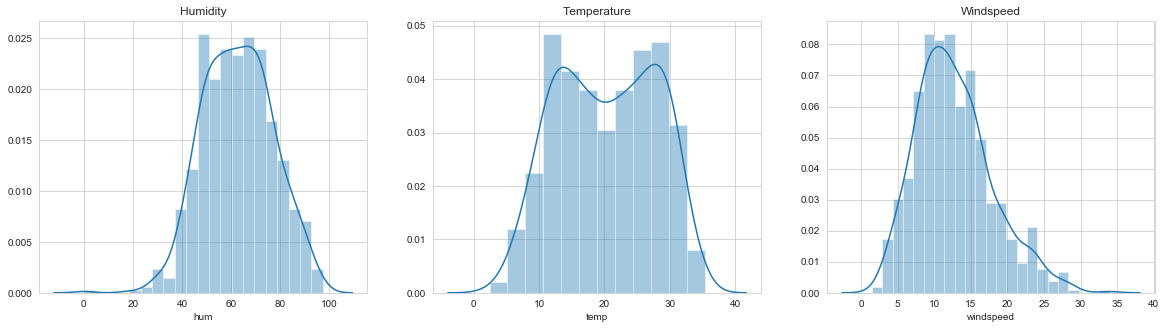

In [11]:
# Checking distribution of various numerical variables

fig,ax=plt.subplots(1,3,figsize=(20,5))
sns.distplot(df.hum,ax=ax[0])
ax[0].set_title('Humidity')
sns.distplot(df.temp,ax=ax[1])
ax[1].set_title('Temperature')
sns.distplot(df.windspeed,ax=ax[2])
ax[2].set_title('Windspeed')
plt.show()

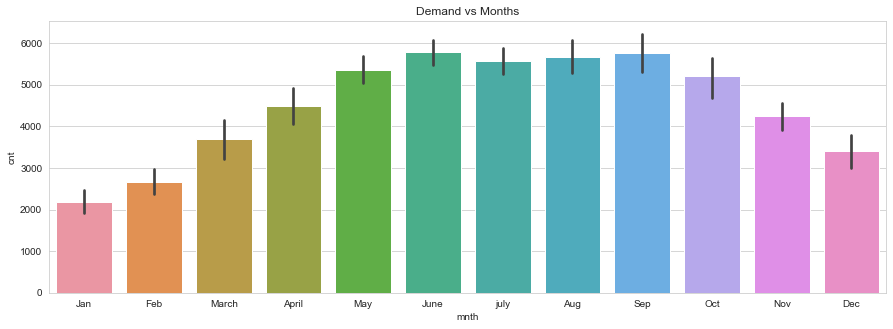

In [12]:
# Demand in different months

plt.figure(figsize=(15,5))
sns.barplot(x='mnth',y='cnt',data=df,order=['Jan','Feb','March','April','May','June','july','Aug','Sep','Oct','Nov','Dec'])
plt.title('Demand vs Months')
plt.show()

Demand for bikes is highest in months from May to Sep.

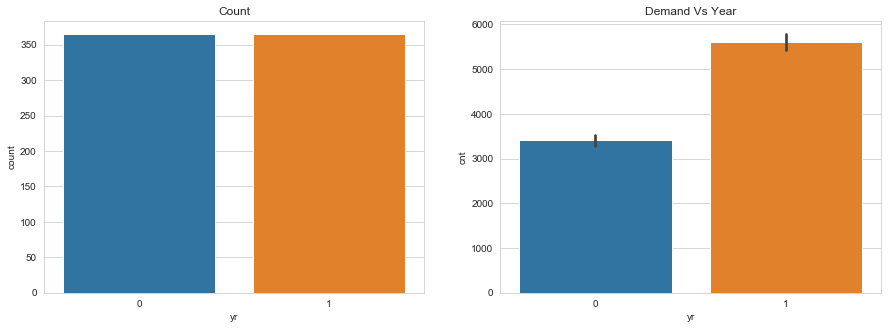

In [13]:
# Count and demand of bikes in different years

fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.countplot('yr',data=df,ax=ax[0])
ax[0].set_title('Count')
sns.barplot(x='yr',y='cnt',data=df,ax=ax[1])
ax[1].set_title('Demand Vs Year')
plt.show()

Demand for bikes is higher in 2019 than 2018.

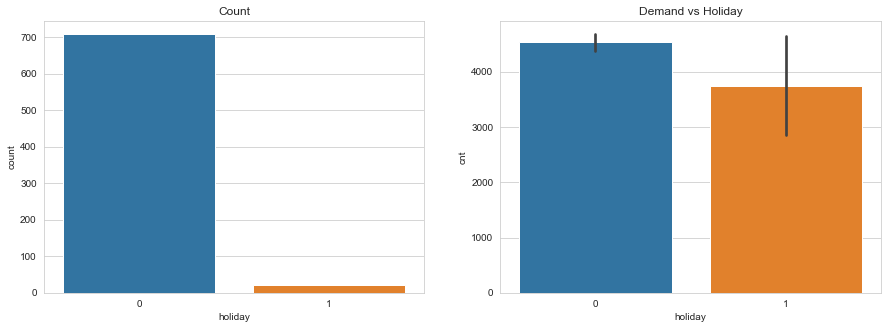

In [14]:
# Count and demand of bikes according to holiday.

fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.countplot('holiday',data=df,ax=ax[0])
ax[0].set_title('Count')
sns.barplot(x='holiday',y='cnt',data=df,ax=ax[1])
ax[1].set_title('Demand vs Holiday')
plt.show()

Demand for bikes is higher on non-holiday days.

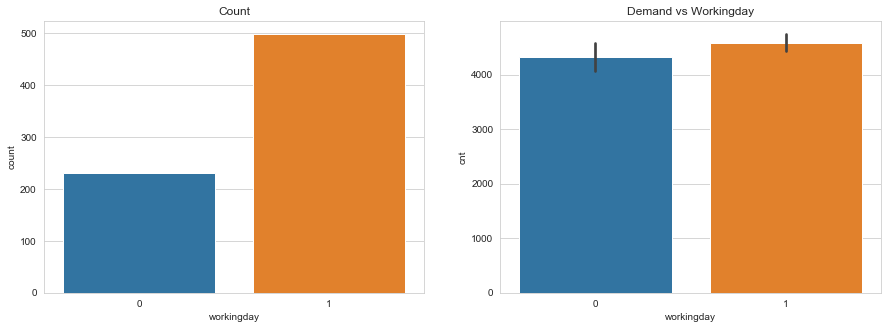

In [15]:
# Count and demand of bikes according to workingday.

fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.countplot('workingday',data=df,ax=ax[0])
ax[0].set_title('Count')
sns.barplot(x='workingday',y='cnt',data=df,ax=ax[1])
ax[1].set_title('Demand vs Workingday')
plt.show()

Demand for bikes is higher on working day

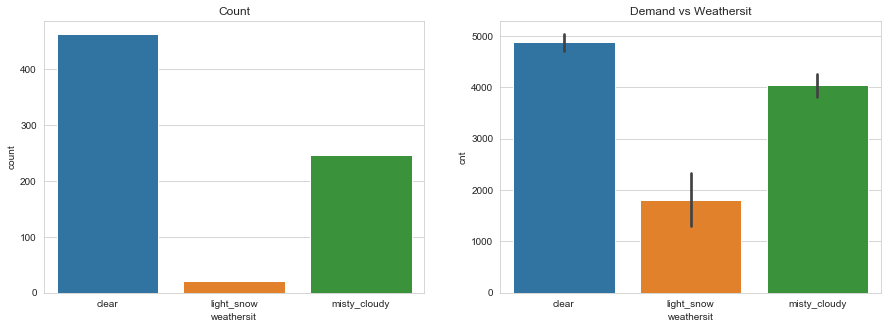

In [16]:
# Count and demand of bikes according to weathersit.

fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.countplot('weathersit',data=df,ax=ax[0])
ax[0].set_title('Count')
sns.barplot(x='weathersit',y='cnt',data=df,ax=ax[1])
ax[1].set_title('Demand vs Weathersit')
plt.show()

Demand for Bikes is highest on clear days and least on days with light snow

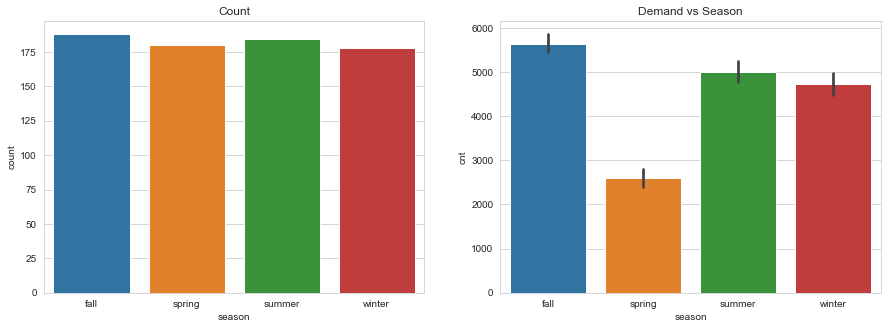

In [17]:
# Count and demand of bikes according to Season.

fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.countplot('season',data=df,ax=ax[0])
ax[0].set_title('Count')
sns.barplot(x='season',y='cnt',data=df,ax=ax[1])
ax[1].set_title('Demand vs Season')
plt.show()

Demand for bikes is highest in fall and least in spring.

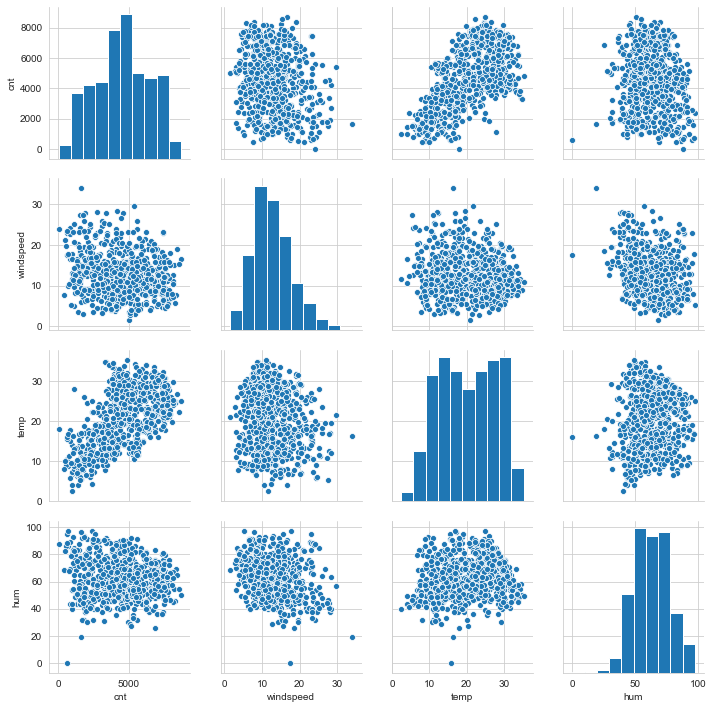

In [18]:
sns.pairplot(df[['cnt','windspeed','temp','hum']])
plt.show()

There is strong linear relation between cnt and temp.

## Data Preparation

### Dummy Variables

In [19]:
# Creating dummy variables for category variables : season,mnth,weekday,weathersit.

season=pd.get_dummies(df['season'],drop_first=True)
month=pd.get_dummies(df.mnth,drop_first=True)
weekday=pd.get_dummies(df.weekday,drop_first=True)
weathersit=pd.get_dummies(df.weathersit,drop_first=True)

# Concating all the dummy variables with main dataframe
df=pd.concat([df,season,month,weekday,weathersit],axis=1)

# Dropping variables for which we have created dummy variables 
df.drop(columns=['mnth','season','weekday','weathersit'],inplace=True)

In [20]:
df.shape

(730, 29)

### Train-Test Split

In [21]:
# Dividing dataset into train and test

df_train,df_test=train_test_split(df,test_size=0.3,random_state=100)

# Checking shape of newly created train and test datasets
print(df_train.shape)
print(df_test.shape)

(511, 29)
(219, 29)


### Scaling 

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
# Creating scaling object
scaler=MinMaxScaler()

# Creating list of numerical columns
num_vars=['temp','hum','windspeed']

# Scaling numerical variables
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

In [24]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Sep,july,Mon,Sat,Sun,Thur,Tue,Wed,light_snow,misty_cloudy
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.508806,0.025440,0.677104,0.537386,0.650333,0.320844,4491.303327,0.242661,0.246575,0.248532,...,0.080235,0.076321,0.142857,0.127202,0.154599,0.158513,0.150685,0.133072,0.029354,0.344423
std,0.500412,0.157613,0.468042,0.225640,0.145741,0.169639,1953.413860,0.429112,0.431440,0.432585,...,0.271923,0.265771,0.350270,0.333525,0.361876,0.365579,0.358092,0.339986,0.168963,0.475645
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.341151,0.538858,0.199179,3123.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542077,0.653499,0.298098,4539.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754401,0.414438,6008.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing train dataset into X and Y

In [25]:
y_train=df_train.pop('cnt')
x_train=df_train

### Linear Regression through RFE

In [26]:
# Importing required libraries

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [27]:
# Creating linear regression object

lm=LinearRegression()
lm.fit(x_train,y_train)

# Running RFE with number of outputs - 15 
rfe=RFE(lm,15)
rfe=rfe.fit(x_train,y_train)

In [28]:
# Looking at all columns with rfe support and ranking
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 6),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('June', False, 11),
 ('March', False, 12),
 ('May', False, 5),
 ('Nov', False, 2),
 ('Oct', False, 10),
 ('Sep', True, 1),
 ('july', True, 1),
 ('Mon', False, 7),
 ('Sat', False, 14),
 ('Sun', True, 1),
 ('Thur', False, 13),
 ('Tue', False, 8),
 ('Wed', False, 9),
 ('light_snow', True, 1),
 ('misty_cloudy', True, 1)]

In [29]:
# Top 15 important columns
col=x_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Jan', 'Sep', 'july', 'Sun', 'light_snow',
       'misty_cloudy'],
      dtype='object')

### Building model using statsmodel for better interpretation.

In [30]:
import statsmodels.api as sm

In [31]:
# Adding a constant variable to train dataset with rfe selected variables
x_train_sm=sm.add_constant(x_train[col])

# Running linear model
lm=sm.OLS(y_train,x_train_sm).fit()

In [32]:
# Reading summary of linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.5
Date:                Mon, 02 Nov 2020   Prob (F-statistic):          1.50e-191
Time:                        23:13:20   Log-Likelihood:                -4114.8
No. Observations:                 511   AIC:                             8262.
Df Residuals:                     495   BIC:                             8329.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2206.7691    314.541      7.016      0.000    1588.770    2824.769
yr            2007.6643     69.617     28.839      0.000    1870.884    2144.445
holiday       -506.7813    233.946     -2.166      0.031    -966.431     -47.132
workingday     380.7061    100.209      3.799      0.000     183.819     577.594
temp          4437.9745    298.850     14.850      0.000    3850.804    5025.145
hum          -1366.6057    324.706     -4.209      0.000   -2004.578    -728.633
windspeed    -1619.1366    221.733     -7.302      0.000   -2054.791   -1183.482
spring        -439.3779    179.750     -2.444      0.015    -792.545     -86.211
summer         442.3136    129.046      3.428      0.001     188.768     695.859
winter         823.3397    150.044      5.487      0.000     528.538    1118.142
Jan           -298.4753    150.964     -1.977      0.049    -595.085      -1.865
Sep            705.8967    143.243      4.928      0.000     424.457     987.336
july          -461.8136    157.127     -2.939      0.003    -770.531    -153.096
Sun            466.0363    126.162      3.694      0.000     218.158     713.914
light_snow   -2154.6073    226.496     -9.513      0.000   -2599.620   -1709.594
misty_cloudy  -492.1456     90.091     -5.463      0.000    -669.154    -315.137
==============================================================================
Omnibus:                       66.238   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.707
Skew:                          -0.677   Prob(JB):                     2.09e-35
Kurtosis:                       5.381   Cond. No.                         22.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
# Importing required library for calculating VIF.
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [34]:
# Calculate the VIFs for the new model
x_train_new=x_train_sm.drop(columns='const')
vif=pd.DataFrame()
vif['Feature']=x_train_new.columns
vif['VIF']=[variance_inflation_factor(x_train_new.values,i) for i in range(x_train_new.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Feature,VIF
4,hum,29.39
3,temp,17.80
2,workingday,5.32
5,windspeed,4.73
6,spring,4.53
8,winter,3.48
7,summer,2.85
14,misty_cloudy,2.29
0,yr,2.09
12,Sun,1.98


 `Hum` has very high VIF , Therefore we will remove it and again run our model

In [35]:
# Dropping hum 
x_train_sm.drop(columns='hum',inplace=True)

# Running model again
lm=sm.OLS(y_train,x_train_sm).fit()

# Reading summary of this new model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     190.0
Date:                Mon, 02 Nov 2020   Prob (F-statistic):          6.18e-189
Time:                        23:13:20   Log-Likelihood:                -4123.8
No. Observations:                 511   AIC:                             8278.
Df Residuals:                     496   BIC:                             8341.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1522.3973    273.747      5.561      0.000     984.550    2060.244
yr            2042.2594     70.285     29.057      0.000    1904.167    2180.352
holiday       -485.9446    237.801     -2.043      0.042    -953.167     -18.722
workingday     407.3465    101.680      4.006      0.000     207.570     607.123
temp          4111.1718    293.408     14.012      0.000    3534.696    4687.647
windspeed    -1356.7226    216.342     -6.271      0.000   -1781.782    -931.663
spring        -517.8708    181.767     -2.849      0.005    -874.999    -160.743
summer         387.6602    130.536      2.970      0.003     131.188     644.133
winter         693.3129    149.282      4.644      0.000     400.009     986.617
Jan           -339.3758    153.168     -2.216      0.027    -640.315     -38.437
Sep            654.0040    145.096      4.507      0.000     368.926     939.082
july          -417.7679    159.397     -2.621      0.009    -730.945    -104.591
Sun            507.6340    127.875      3.970      0.000     256.390     758.878
light_snow   -2533.7977    211.278    -11.993      0.000   -2948.909   -2118.687
misty_cloudy  -710.4234     74.897     -9.485      0.000    -857.578    -563.269
==============================================================================
Omnibus:                       67.777   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.366
Skew:                          -0.690   Prob(JB):                     2.03e-36
Kurtosis:                       5.411   Cond. No.                         20.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
x_train_new=x_train_sm.drop(columns='const')
vif=pd.DataFrame()
vif['Feature']=x_train_new.columns
vif['VIF']=[variance_inflation_factor(x_train_new.values,i) for i in range(x_train_new.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Feature,VIF
3,temp,7.08
2,workingday,5.26
4,windspeed,4.68
5,spring,3.07
6,summer,2.34
0,yr,2.08
7,winter,1.99
11,Sun,1.97
8,Jan,1.62
10,july,1.59


After removing hum R2 is almost same and VIF of temp has reduced but still it is higher than 5.  
VIF of workingday is also greater than 5 , we will first remove this and run our model again.

In [37]:
# Dropping workingday and running model again
x_train_sm.drop(columns='workingday',inplace=True)

# Running model again
lm=sm.OLS(y_train,x_train_sm).fit()

# Reading summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.4
Date:                Mon, 02 Nov 2020   Prob (F-statistic):          1.12e-186
Time:                        23:13:21   Log-Likelihood:                -4131.9
No. Observations:                 511   AIC:                             8292.
Df Residuals:                     497   BIC:                             8351.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1858.8114    264.465      7.029      0.000    1339.205    2378.418
yr            2044.8505     71.338     28.664      0.000    1904.690    2185.011
holiday       -816.3866    226.390     -3.606      0.000   -1261.186    -371.587
temp          4122.1149    297.804     13.842      0.000    3537.005    4707.225
windspeed    -1363.5304    219.586     -6.210      0.000   -1794.962    -932.098
spring        -531.8072    184.465     -2.883      0.004    -894.234    -169.381
summer         380.4966    132.486      2.872      0.004     120.196     640.797
winter         668.8065    151.399      4.418      0.000     371.347     966.267
Jan           -333.6454    155.463     -2.146      0.032    -639.092     -28.199
Sep            660.2348    147.268      4.483      0.000     370.891     949.579
july          -443.5813    161.660     -2.744      0.006    -761.203    -125.959
Sun            172.0326     98.067      1.754      0.080     -20.644     364.710
light_snow   -2491.0681    214.180    -11.631      0.000   -2911.878   -2070.259
misty_cloudy  -694.0854     75.910     -9.144      0.000    -843.229    -544.942
==============================================================================
Omnibus:                       66.075   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.268
Skew:                          -0.713   Prob(JB):                     1.28e-31
Kurtosis:                       5.155   Cond. No.                         17.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
x_train_new=x_train_sm.drop(columns='const')
vif=pd.DataFrame()
vif['Feature']=x_train_new.columns
vif['VIF']=[variance_inflation_factor(x_train_new.values,i) for i in range(x_train_new.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Feature,VIF
2,temp,5.17
3,windspeed,4.65
4,spring,2.76
5,summer,2.24
0,yr,2.08
6,winter,1.80
7,Jan,1.61
9,july,1.59
12,misty_cloudy,1.56
8,Sep,1.34


Drop in R2 is very marginal and VIF of temp has further decreased.  
`Sun` has p-value greater than 0.05 , therefore we will remove it. 

In [39]:
# Dropping Sun column
x_train_sm=x_train_sm.drop(columns='Sun')

# Running model again 
lm=sm.OLS(y_train,x_train_sm).fit()

# Reading model summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.7
Date:                Mon, 02 Nov 2020   Prob (F-statistic):          3.46e-187
Time:                        23:13:21   Log-Likelihood:                -4133.5
No. Observations:                 511   AIC:                             8293.
Df Residuals:                     498   BIC:                             8348.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1887.8974    264.494      7.138      0.000    1368.235    2407.560
yr            2041.0316     71.453     28.565      0.000    1900.645    2181.418
holiday       -845.4055    226.255     -3.737      0.000   -1289.938    -400.873
temp          4111.0375    298.358     13.779      0.000    3524.843    4697.232
windspeed    -1345.4059    219.800     -6.121      0.000   -1777.256    -913.556
spring        -533.5723    184.846     -2.887      0.004    -896.747    -170.398
summer         377.9180    132.753      2.847      0.005     117.092     638.744
winter         670.0846    151.712      4.417      0.000     372.010     968.159
Jan           -331.1287    155.781     -2.126      0.034    -637.197     -25.060
Sep            662.0149    147.571      4.486      0.000     372.076     951.954
july          -439.7359    161.982     -2.715      0.007    -757.989    -121.483
light_snow   -2486.9861    214.613    -11.588      0.000   -2908.645   -2065.327
misty_cloudy  -693.2208     76.066     -9.113      0.000    -842.671    -543.770
==============================================================================
Omnibus:                       59.917   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.728
Skew:                          -0.638   Prob(JB):                     5.55e-30
Kurtosis:                       5.168   Cond. No.                         17.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
x_train_new=x_train_sm.drop(columns='const')
vif=pd.DataFrame()
vif['Feature']=x_train_new.columns
vif['VIF']=[variance_inflation_factor(x_train_new.values,i) for i in range(x_train_new.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Feature,VIF
2,temp,5.14
3,windspeed,4.62
4,spring,2.75
5,summer,2.24
0,yr,2.08
6,winter,1.79
7,Jan,1.61
9,july,1.59
11,misty_cloudy,1.56
8,Sep,1.34


R2 is almost same.  
According to domain knowledge we will keep temperature even though it still has VIF higher than 5.  
We will remove months one by one and see their effect on Adjusted R2 because temp is generally related to months

In [41]:
# Dropping Jan column
x_train_sm=x_train_sm.drop(columns='Jan')

# Running model again
lm=sm.OLS(y_train,x_train_sm).fit()

# Reading summary of new model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.0
Date:                Mon, 02 Nov 2020   Prob (F-statistic):          2.09e-187
Time:                        23:13:21   Log-Likelihood:                -4135.8
No. Observations:                 511   AIC:                             8296.
Df Residuals:                     499   BIC:                             8346.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1749.8251    257.296      6.801      0.000    1244.308    2255.343
yr            2034.8276     71.645     28.402      0.000    1894.065    2175.590
holiday       -851.4754    227.033     -3.750      0.000   -1297.534    -405.417
temp          4274.3285    289.313     14.774      0.000    3705.907    4842.749
windspeed    -1284.8495    218.713     -5.875      0.000   -1714.561    -855.138
spring        -580.9627    184.142     -3.155      0.002    -942.753    -219.173
summer         404.7601    132.616      3.052      0.002     144.205     665.316
winter         722.6686    150.208      4.811      0.000     427.550    1017.787
Sep            665.9009    148.079      4.497      0.000     374.966     956.836
july          -454.5169    162.402     -2.799      0.005    -773.594    -135.440
light_snow   -2476.3274    215.310    -11.501      0.000   -2899.353   -2053.302
misty_cloudy  -700.8867     76.248     -9.192      0.000    -850.694    -551.080
==============================================================================
Omnibus:                       59.223   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.738
Skew:                          -0.630   Prob(JB):                     9.10e-30
Kurtosis:                       5.167   Cond. No.                         17.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
x_train_new=x_train_sm.drop(columns='const')
vif=pd.DataFrame()
vif['Feature']=x_train_new.columns
vif['VIF']=[variance_inflation_factor(x_train_new.values,i) for i in range(x_train_new.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Feature,VIF
2,temp,5.10
3,windspeed,4.61
5,summer,2.23
4,spring,2.08
0,yr,2.07
6,winter,1.79
8,july,1.58
10,misty_cloudy,1.55
7,Sep,1.34
9,light_snow,1.08


In [43]:
# Dropping july
x_train_sm=x_train_sm.drop(columns='july')

# Running linear model again
lm=sm.OLS(y_train,x_train_sm).fit()

# Reading summar of new model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.8
Date:                Mon, 02 Nov 2020   Prob (F-statistic):          6.20e-187
Time:                        23:13:21   Log-Likelihood:                -4139.8
No. Observations:                 511   AIC:                             8302.
Df Residuals:                     500   BIC:                             8348.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1674.8338    257.640      6.501      0.000    1168.644    2181.024
yr            2039.7992     72.110     28.287      0.000    1898.122    2181.476
holiday       -841.5233    228.551     -3.682      0.000   -1290.562    -392.484
temp          4158.7207    288.298     14.425      0.000    3592.295    4725.146
windspeed    -1286.4009    220.202     -5.842      0.000   -1719.035    -853.766
spring        -478.2109    181.674     -2.632      0.009    -835.150    -121.272
summer         540.8859    124.215      4.354      0.000     296.838     784.934
winter         834.0443    145.827      5.719      0.000     547.535    1120.554
Sep            789.4360    142.310      5.547      0.000     509.837    1069.035
light_snow   -2483.6839    216.760    -11.458      0.000   -2909.556   -2057.811
misty_cloudy  -688.4960     76.638     -8.984      0.000    -839.068    -537.924
==============================================================================
Omnibus:                       63.477   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.156
Skew:                          -0.675   Prob(JB):                     1.35e-31
Kurtosis:                       5.204   Cond. No.                         17.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
x_train_new=x_train_sm.drop(columns='const')
vif=pd.DataFrame()
vif['Feature']=x_train_new.columns
vif['VIF']=[variance_inflation_factor(x_train_new.values,i) for i in range(x_train_new.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Feature,VIF
3,windspeed,4.60
2,temp,3.84
0,yr,2.07
4,spring,1.99
5,summer,1.90
6,winter,1.63
9,misty_cloudy,1.55
7,Sep,1.23
8,light_snow,1.08
1,holiday,1.04


In [45]:
# Dropping Sep 
x_train_sm=x_train_sm.drop(columns='Sep')

# Running linear model again
lm=sm.OLS(y_train,x_train_sm).fit()

# Reading summar of new model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.8
Date:                Mon, 02 Nov 2020   Prob (F-statistic):          1.09e-181
Time:                        23:13:21   Log-Likelihood:                -4155.0
No. Observations:                 511   AIC:                             8330.
Df Residuals:                     501   BIC:                             8372.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1946.9823    260.332      7.479      0.000    1435.505    2458.460
yr            2039.3806     74.222     27.477      0.000    1893.556    2185.206
holiday       -762.1907    234.783     -3.246      0.001   -1223.472    -300.910
temp          4058.6238    296.159     13.704      0.000    3476.757    4640.491
windspeed    -1342.8027    226.408     -5.931      0.000   -1787.630    -897.976
spring        -715.1157    181.754     -3.935      0.000   -1072.210    -358.021
summer         333.6648    121.934      2.736      0.006      94.099     573.230
winter         660.6811    146.610      4.506      0.000     372.634     948.728
light_snow   -2426.7938    222.858    -10.889      0.000   -2864.645   -1988.943
misty_cloudy  -655.7660     78.648     -8.338      0.000    -810.287    -501.245
==============================================================================
Omnibus:                       62.528   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.907
Skew:                          -0.636   Prob(JB):                     6.26e-34
Kurtosis:                       5.358   Cond. No.                         17.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
x_train_new=x_train_sm.drop(columns='const')
vif=pd.DataFrame()
vif['Feature']=x_train_new.columns
vif['VIF']=[variance_inflation_factor(x_train_new.values,i) for i in range(x_train_new.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Feature,VIF
3,windspeed,4.60
2,temp,3.56
0,yr,2.07
4,spring,1.95
5,summer,1.80
6,winter,1.61
8,misty_cloudy,1.53
7,light_snow,1.08
1,holiday,1.04


p-value of all variables is less than 0.05 and vif is also within suggested range.  
Also on removal of Jan,july and Sep our R2 has reduced very marginally.  
Therefore we will go ahead with this model

#### Model :
cnt = 1946 + 2039 * yr - 762 * holiday + 4058 * temp - 1342 * windspeed - 715 * spring + 333 * summer + 660 * winter - 2426 * light_snow - 655 * misty_cloudy

## Resisual Analysis

In [47]:
# Predicting target variable on training dataset.
y_train_pred=lm.predict(x_train_sm)

# Creating residuals 
res=y_train-y_train_pred

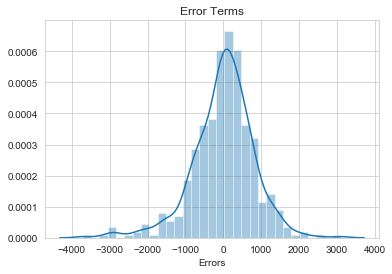

In [48]:
# Plotting histogram for erroe terms
sns.distplot(res)
plt.title('Error Terms')
plt.xlabel('Errors')
plt.show()

Error terms are normal distributed with mean 0 

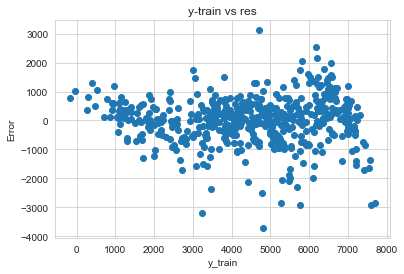

In [49]:
plt.scatter(x=y_train_pred,y=res)
plt.title('y-train vs res')
plt.xlabel('y_train')
plt.ylabel('Error')
plt.show()

No pattern could be seen in error terms :
- This means that error terms are independent.
- Also error terms are homoscedastic.

Therefore all our assumptions of linear regression holds true and we can make predictions on our model.

### Making Predictions

In [50]:
# Applying Scaling to test dataset
df_test[num_vars]=scaler.transform(df_test[num_vars])

In [51]:
# Dividing test dataset into X and Y
y_test=df_test.pop('cnt')
x_test=df_test

In [52]:
# Creating x_test with same columns as in our model
x_test_sm=x_test[x_train_new.columns]

# Adding constant in x_test to make predictions
x_test_sm=sm.add_constant(x_test_sm)

# Making predictions 
y_pred=lm.predict(x_test_sm)

### Model Evaluation

In [53]:
from sklearn.metrics import r2_score

In [54]:
r2_score(y_test,y_pred)

0.8010932090256243

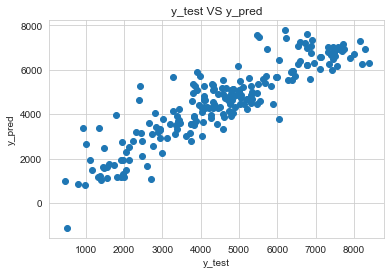

In [55]:
# Visualizing y_test and y_pred to understand the spread.
plt.scatter(y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('y_test VS y_pred')
plt.show()

### Equation Of Final Model :

cnt = 1946 + 2039 * yr - 762 * holiday + 4058 * temp - 1342 * windspeed - 715 * spring + 333 * summer + 660 * winter - 2426 * light_snow - 655 * misty_cloudy

R2 = 82.2%  
R2 adjusted = 81.9%  
R2 on test data =80.1%